In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Handwritten numbers task

In [21]:
# Loading the data
def load_mnist_images(filename, num_images, image_shape=(28, 28)):
    with open(filename, 'rb') as f:
        f.read(16)  # skip header
        data = np.frombuffer(f.read(), dtype=np.uint8)
        return data.reshape((num_images, *image_shape))

def load_mnist_labels(filename, num_labels):
    with open(filename, 'rb') as f:
        f.read(8)  # skip header
        return np.frombuffer(f.read(), dtype=np.uint8)
    
# Set constants
num_train = 60000
num_test = 10000
image_shape = (28, 28)

# Load the data
train_images = load_mnist_images("train_images.bin", num_train, image_shape)
train_image_labels = load_mnist_labels("train_labels.bin", num_train)

test_images = load_mnist_images("test_images.bin", num_test, image_shape)
test_image_labels = load_mnist_labels("test_labels.bin", num_test)

# Checking the shapes of the data
print(f"Shape of train_images: {train_images.shape}")
print(f"Shape of test_images: {test_images.shape}")
print(f"Shape of train_labels: {train_image_labels.shape}")
print(f"Shape of test_labels: {test_image_labels.shape}")

Shape of train_images: (60000, 28, 28)
Shape of test_images: (10000, 28, 28)
Shape of train_labels: (60000,)
Shape of test_labels: (10000,)


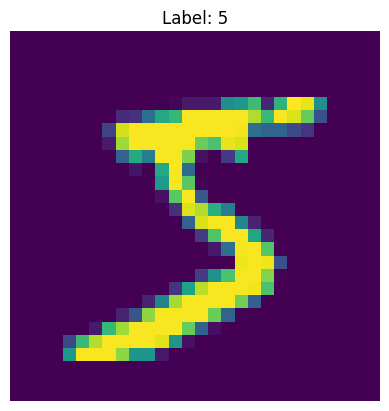

In [22]:
# Visualizing a digit to chech the data loading
plt.imshow(train_images[0])
plt.title(f"Label: {train_image_labels[0]}")
plt.axis('off')
plt.show()

### 1.a Nearest Neighborhood classifier

Design a (NN)-based classifier using Euclidian distance.

In [23]:
from NN_classifier import NN_classifier

# Divide dataset into chunks of images
batch_size = 1000
indices = np.random.choice(len(train_images), size=batch_size, replace=False)
train_data = train_images[indices]
train_labels = train_image_labels[indices]

conf_matrix, correct_predictions, wrong_predictions, correct_labels, wrong_labels = NN_classifier(train_data, train_labels, test_images, test_image_labels)

Runtime: 3.58 seconds
Error Rate: 11.80%


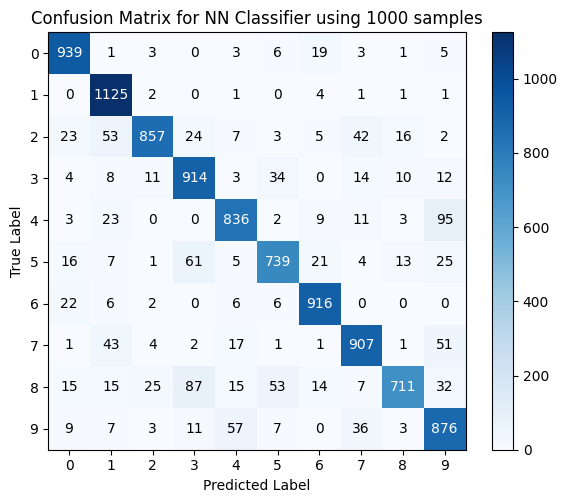

In [24]:
# Confusion matrix
from conf_matrix import plot_cm

class_names = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]
plot_cm(conf_matrix, class_names, f"Confusion Matrix for NN Classifier using {batch_size} samples")

### 1.b Plotting misclassified images

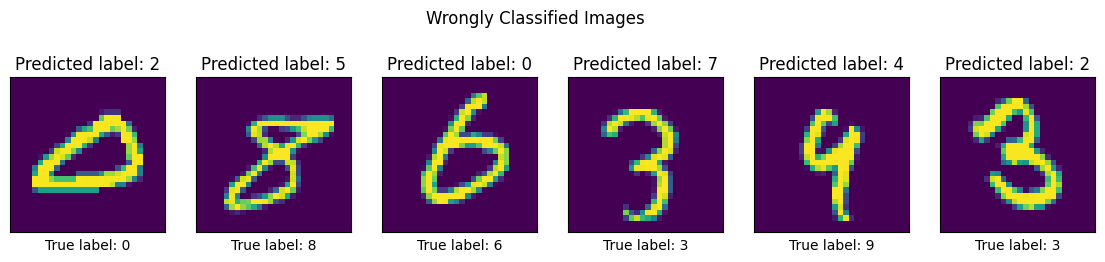

In [25]:
from image_plot import plot_wrong_images

# Plot of some wrongly classified images

true_labels = [pair[0] for pair in wrong_labels]
pred_labels = [pair[1] for pair in wrong_labels]

plot_wrong_images(wrong_predictions, pred_labels, true_labels)

### 1.c Plotting correctly classified images

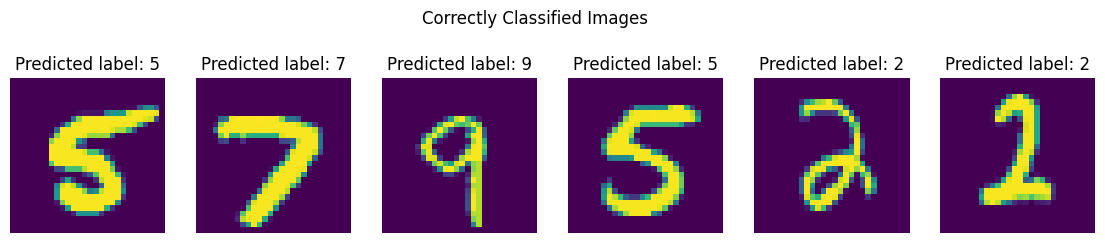

In [26]:
from image_plot import plot_correct_images

# Plot of some correctly classified images
plot_correct_images(correct_predictions, correct_labels)


### 2.a Clustering task

Perfrom clustering on the 6000 training vectors for each class into M = 64 clusters.

In [27]:
from NN_classifier import clustering

cluster_centers, cluster_labels = clustering(train_images, train_image_labels)

### 2.b Classify with the NN classifier using the 64 templates per class

Runtime: 2.22 seconds
Error Rate: 4.77%


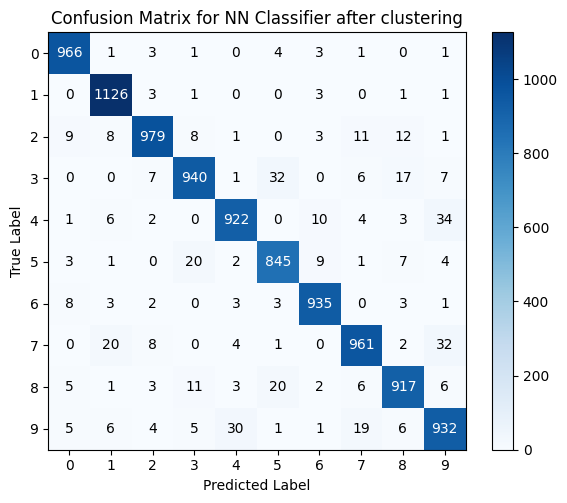

In [28]:
conf_matrix_cl, correct_predictions_cl, wrong_predictions_cl, correct_labels_cl, wrong_labels_cl = NN_classifier(cluster_centers, cluster_labels, test_images, test_image_labels)

# Plotting the confusion matrix after clustering algorithm
plot_cm(conf_matrix_cl, class_names, "Confusion Matrix for NN Classifier after clustering")

### 2.c Classify with KNN classifier

Runtime: 2.69 seconds
Error Rate: 6.30%


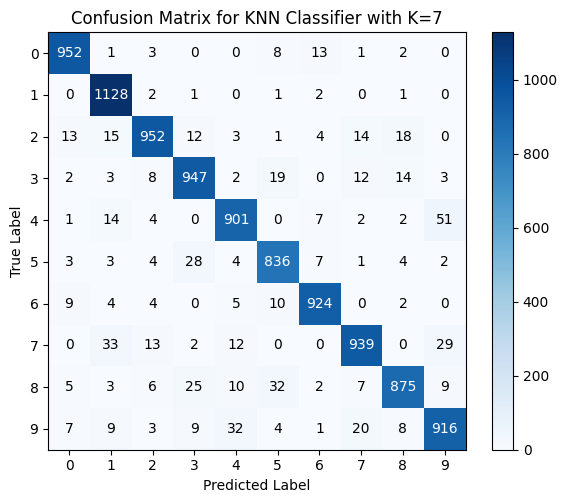

In [29]:
from NN_classifier import k_NN_classifier

conf_matrix_knn, correct_predictions_knn, wrong_predictions_knn, correct_labels_knn, wrong_labels_knn = k_NN_classifier(cluster_centers, cluster_labels, test_images, test_image_labels)

# Plotting the confusion matrix for the KNN classifier
plot_cm(conf_matrix_knn, class_names, "Confusion Matrix for KNN Classifier with K=7")